In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("/kaggle/input/analytics-vidhya-jobathon/train_IxoE5JN.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [4]:
data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [5]:
data.datetime=pd.to_datetime(data.datetime,yearfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [7]:
data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [8]:
data.set_index('datetime', inplace=True)

In [9]:
data.drop('row_id', axis=1, inplace=True)

In [10]:
data.isna().sum()

energy    1900
dtype: int64

In [11]:
data=data.fillna(method='bfill')

<AxesSubplot:xlabel='datetime'>

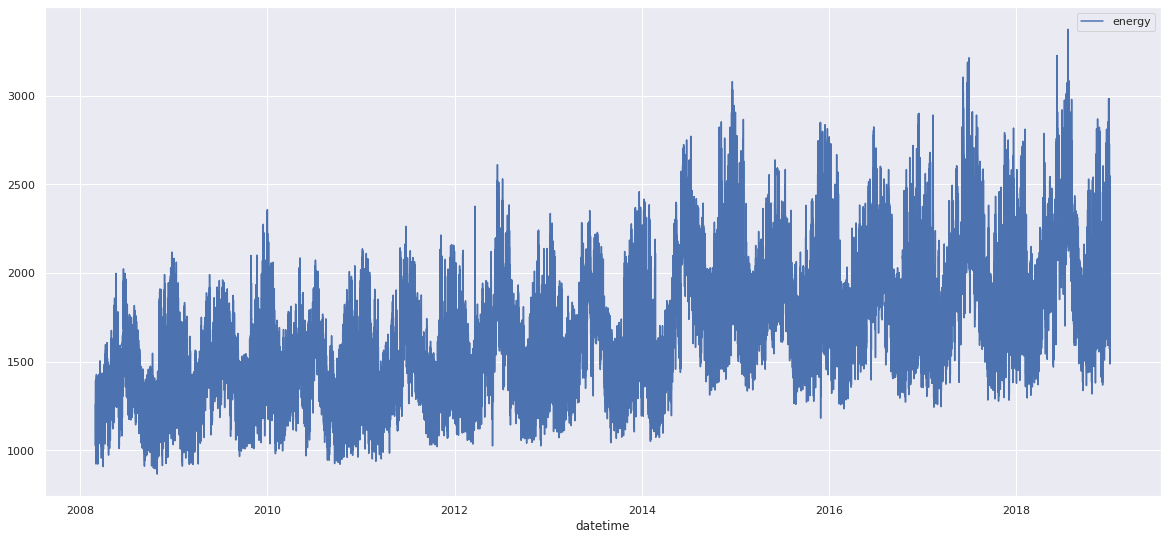

In [12]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data)

In [13]:
data.tail()

,energy
datetime,
2018-12-31 19:00:00,2528.4468
2018-12-31 20:00:00,2461.8836
2018-12-31 21:00:00,2365.9944
2018-12-31 22:00:00,2342.9428
2018-12-31 23:00:00,2180.2176


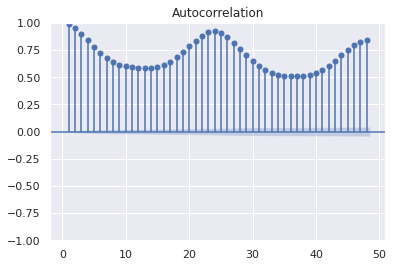

In [14]:

sm.tsa.graphics.plot_acf(data, zero=False, lags=48)
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


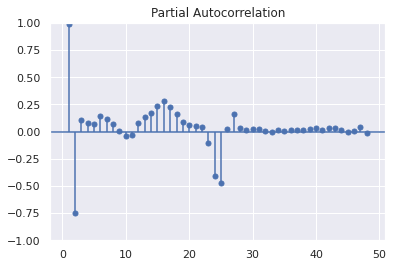

In [15]:
sm.tsa.graphics.plot_pacf(data,lags=48, zero=False)
plt.show()

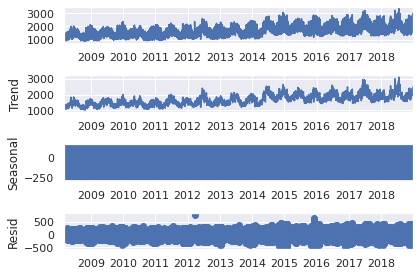

In [16]:
additive=sm.tsa.seasonal_decompose(data,model="additive" )
additive.plot()
plt.show()

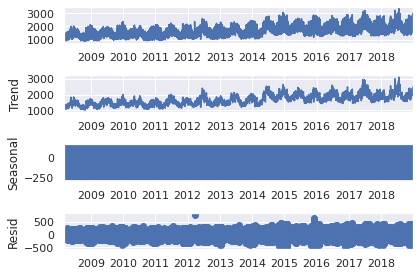

In [17]:
multiplicative=sm.tsa.seasonal_decompose(data,model="multiplicative" )
additive.plot()
plt.show()

In [18]:
data["hour"]=data.index.hour
data["month"]=data.index.month
data["dow"]=data.index.day_of_week
data["doy"]=data.index.day_of_year



In [19]:
data.head(48)

,energy,hour,month,dow,doy
datetime,,,,,
2008-03-01 00:00:00,1259.985563,0,3,5,61
2008-03-01 01:00:00,1095.541500,1,3,5,61
2008-03-01 02:00:00,1056.247500,2,3,5,61
2008-03-01 03:00:00,1034.742000,3,3,5,61
2008-03-01 04:00:00,1026.334500,4,3,5,61
2008-03-01 05:00:00,1033.768500,5,3,5,61
2008-03-01 06:00:00,1086.780000,6,3,5,61
2008-03-01 07:00:00,1211.742000,7,3,5,61
2008-03-01 08:00:00,1293.693000,8,3,5,61


In [20]:
x_train=data[:"2017-12-31"]
x_test=data["2018-1-1":]

In [21]:
x_train

,energy,hour,month,dow,doy
datetime,,,,,
2008-03-01 00:00:00,1259.985563,0,3,5,61
2008-03-01 01:00:00,1095.541500,1,3,5,61
2008-03-01 02:00:00,1056.247500,2,3,5,61
2008-03-01 03:00:00,1034.742000,3,3,5,61
2008-03-01 04:00:00,1026.334500,4,3,5,61
...,...,...,...,...,...
2017-12-31 19:00:00,1942.416000,19,12,6,365
2017-12-31 20:00:00,1894.776800,20,12,6,365
2017-12-31 21:00:00,1868.062000,21,12,6,365


In [22]:
x_test

,energy,hour,month,dow,doy
datetime,,,,,
2018-01-01 00:00:00,1642.7628,0,1,0,1
2018-01-01 01:00:00,1463.6552,1,1,0,1
2018-01-01 02:00:00,1463.6552,2,1,0,1
2018-01-01 03:00:00,1413.1208,3,1,0,1
2018-01-01 04:00:00,1385.8796,4,1,0,1
...,...,...,...,...,...
2018-12-31 19:00:00,2528.4468,19,12,0,365
2018-12-31 20:00:00,2461.8836,20,12,0,365
2018-12-31 21:00:00,2365.9944,21,12,0,365


In [23]:
y_train=x_train['energy'].reset_index().drop("datetime",axis=1)
y_test=x_test["energy"].reset_index().drop("datetime",axis=1)

In [24]:
y_train=y_train['energy']
y_test=y_test['energy']

In [25]:
x_train=x_train.drop('energy', axis=1)
x_test=x_test.drop('energy', axis=1)

In [26]:
model=RandomForestRegressor(n_estimators=1000,random_state=42, n_jobs=-1)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [27]:
from sklearn.metrics import r2_score 

In [28]:
predicted_test=model.predict(x_train)
predicted_train=model.predict(x_test)

In [29]:
print("train", r2_score(y_train,predicted_test))
print("test", r2_score(y_test,predicted_train))

train 0.6751451620527588
test -0.8027235103558343


In [30]:
x_train

,hour,month,dow,doy
datetime,,,,
2008-03-01 00:00:00,0,3,5,61
2008-03-01 01:00:00,1,3,5,61
2008-03-01 02:00:00,2,3,5,61
2008-03-01 03:00:00,3,3,5,61
2008-03-01 04:00:00,4,3,5,61
...,...,...,...,...
2017-12-31 19:00:00,19,12,6,365
2017-12-31 20:00:00,20,12,6,365
2017-12-31 21:00:00,21,12,6,365


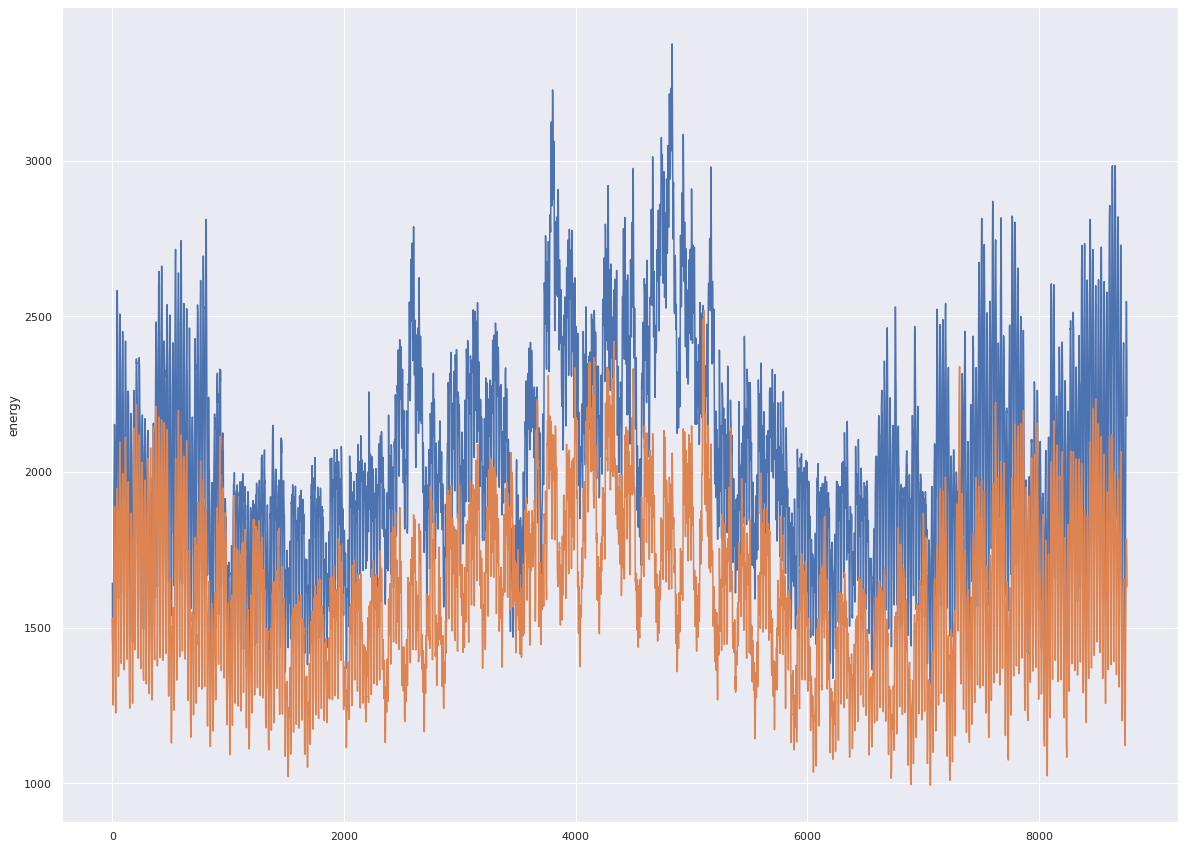

In [31]:
plt.figure(figsize=(20,15))
sns.lineplot(data=y_test)
sns.lineplot(data=predicted_train)
plt.show()

In [32]:
criterion = ["squared_error"]       
n_estimators = [200, 300, 500,1000]       
max_features = ['auto', 'sqrt']     
max_depth = [5, 10, 20]      
max_depth.append(None)     
params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [33]:
gs=GridSearchCV(model, param_grid=params , cv=10, verbose=2)
gs.fit(x_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   5.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.3s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.3s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.3s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.2s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.3s
[CV] END c

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300, 500, 1000]},
             verbose=2)

In [35]:
gs.best_estimator_

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=500,
                      n_jobs=-1, random_state=42)

In [36]:
gs.best_score_

-0.17260330403169538

In [ ]:
gs.score(x_train,y_train)

In [37]:
gs_predicted_train=gs.predict(x_train)
gs_predicted_test=gs.predict(x_test)

In [38]:
print("R2 train best", r2_score(y_train,gs_predicted_train))
print("R2 test best", r2_score(y_test,gs_predicted_test))

R2 train best 0.46921533559725714
R2 test best -0.4491550572667613


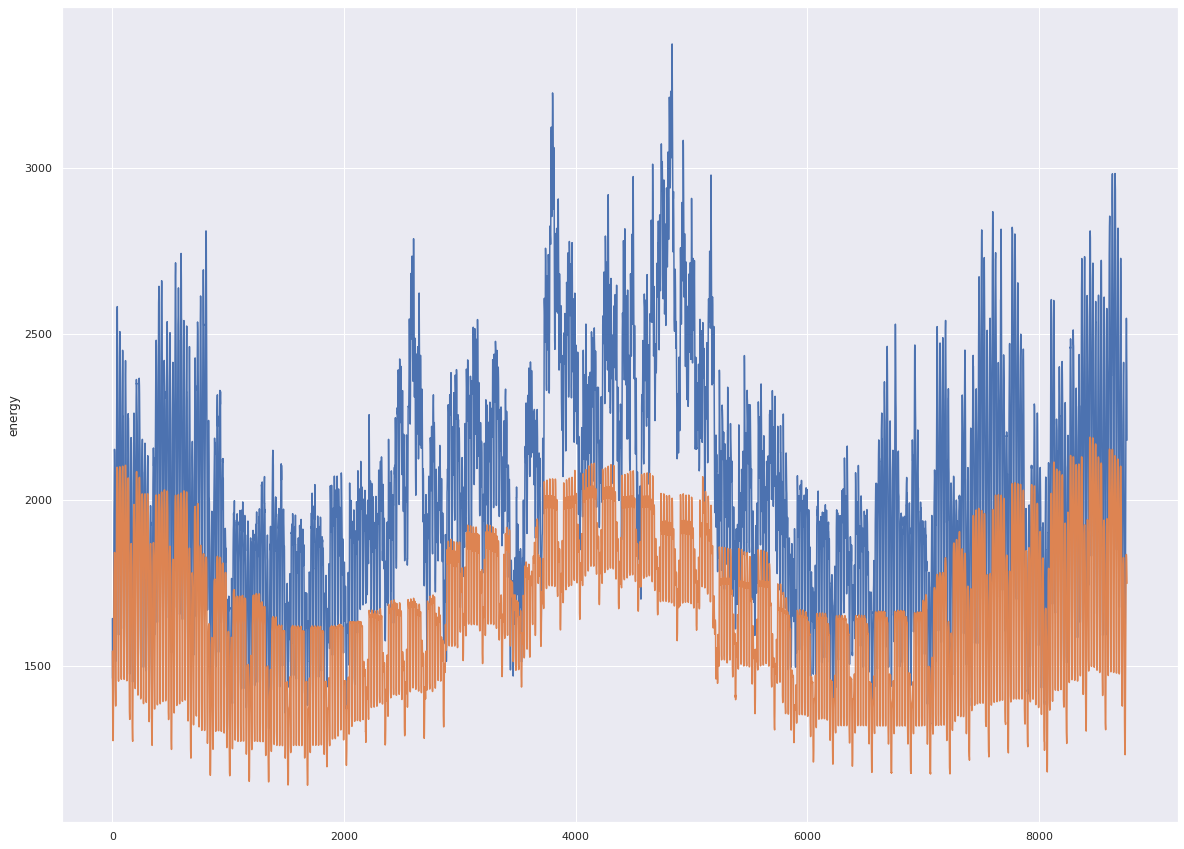

In [39]:
plt.figure(figsize=(20,15))
sns.lineplot(data=y_test)
sns.lineplot(data=gs_predicted_train)
plt.show()